### Using Tensorflow as a generalized compute graph

Fit a high order polynomial , defined by poly order.

In this experiment, we generate a random polynomial function of the given order.

Using the sampled data, we want to see if tensorflow's gradient descent can determine

the random weights (and fit the same curve to the data)

Trend observed is that the higher the polynomial order, the lower the learning rate needs to be.   
(as low as 0.00001) for poly order of 10, otherwise gradient descent diverges (nan values)

For lower order (say 3), need to increase the learning rate, else need a lot more iterations.

In [211]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

poly_order = 2

x = np.arange(-6,2,0.01)
x = x[:,None]
X_ = x
for i in range(2,poly_order+1,1):
    X_ = np.hstack((X_,x**i))
#print(X_)

#W_ = np.random.uniform(-1,1,size=poly_order)
W_ = np.random.sample(size=poly_order) -0.5

W_ = W_[:,None]
b_ = np.random.randn(1)
print('W_ shape:',W_.shape)
print('W_:',W_)
print('b_:',b_)

Y_ = np.dot(X_,W_) + b_

#y_  = 0.01*x1_**5 -0.4*x1_**2+0.3*x1_**2-0.8*x1_-0.55

('W_ shape:', (2, 1))
('W_:', array([[-0.21176276],
       [ 0.49445742]]))
('b_:', array([ 0.16292411]))


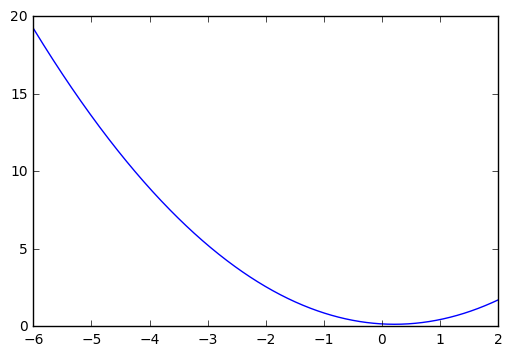

In [212]:
plt.plot(X_[:,0],Y_[:,0])

In [213]:
# Create the model
X = tf.placeholder(tf.float32, [None, poly_order])

W = tf.Variable(tf.zeros([poly_order, 1]))
b = tf.Variable(tf.zeros([1]))

Y = tf.matmul(X, W) + b

Instructions for updating:
Use `tf.global_variables_initializer` instead.
('loss = ', 0.00010868737)
[[-0.21230707]
 [ 0.49502021]]


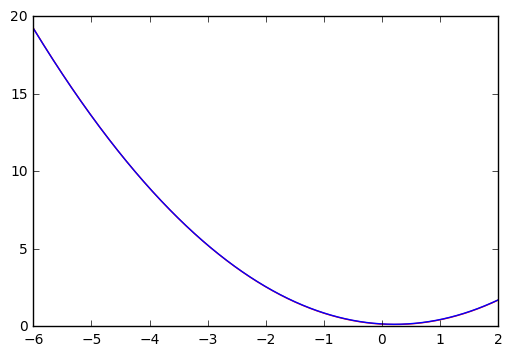

In [214]:
loss = tf.reduce_mean(tf.square(Y - Y_))

optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

# Before starting, initialize the variables.  We will 'run' this first.
init = tf.initialize_all_variables()

# Launch the graph.
sess = tf.Session()
sess.run(init)

# Fit the line.
for step in range(2000):
    sess.run(train, feed_dict={X: X_})
    #if step % 200 == 0:

#print(step, sess.run(W), sess.run(b))
#print('W_:',W_)
#print('b_:',b_)
%matplotlib inline
print('loss = ' , sess.run(loss, feed_dict={X: X_}))
Wpred = sess.run(W)
bpred = sess.run(b)
Ypred = np.dot(X_,Wpred) + bpred

print(Wpred)
plt.plot(X_[:,0],Ypred[:,0], 'r' , X_[:,0],Y_[:,0], 'b')

In [215]:
sess.close()

### Find minima of above function

In [216]:
#X = tf.Variable(tf.zeros([1,poly_order]))
X = tf.Variable(tf.zeros(1))

Y = X*Wpred[0,0] + X*X*Wpred[1,0]

#Y = tf.matmul(X,Wpred) + bpred
#Y = tf.add( tf.add( tf.multiply(_w1,X1) , tf.multiply(_w2,X2) ), _b)

optimizer = tf.train.GradientDescentOptimizer(0.01)

In [217]:
train = optimizer.minimize(Y)

# Before starting, initialize the variables.  We will 'run' this first.
init = tf.global_variables_initializer()

#For tf 0.10 and below
#init = tf.initialize_all_variables()

# Launch the graph.
sess = tf.Session()
sess.run(init)

#Run gradient descent
for step in range(2000):
    sess.run(train)
    #if step % 20 == 0:
print(step, sess.run(X), sess.run(Y))

(1999, array([ 0.21444207], dtype=float32), array([-0.02276386], dtype=float32))


In [155]:
sess.close()